In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 

In [14]:
G = nx.Graph()

G.add_node('Person', label='Krutik')
G.add_node('Movie', label='Movie1')
G.add_node('Movie', label='Movie2')

G.add_edge('Person', 'Movie', relationship='Likes', weight=5)
G.add_edge('Person', 'Movie', relationship='disliked', weight=2)


In [15]:
edge_labels = {(u, v): f'{data["relationship"]}\nWeight: {data["weight"]}' for u, v, data in G.edges(data=True)}

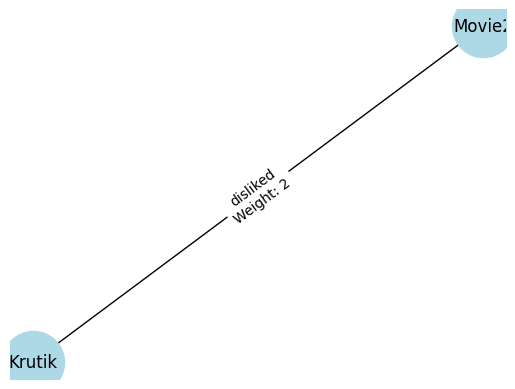

In [16]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()


In [2]:
def load_data(path_to_master_list):
    df = pd.read_csv(path_to_master_list, names=['0'], header=None)
    mstr_list = list(set(df['0'].tolist()))
    mstr_list_clean = [vocab for vocab in mstr_list if str(vocab) != 'nan']
    
    separator = '_'
    word_list = [separator.join(word.split()) for word in mstr_list_clean]
    
    return mstr_list_clean, word_list

mstr_list_clean, mstr_list_clean_joined = load_data('vocab_master_list.csv')

In [3]:
len(mstr_list_clean)

2071

In [4]:
df = pd.read_csv('triples_to_show.csv')

In [5]:
df[df['value'].str.startswith('vi')]

,head,variable,value,prob
791,Course3_W1-S1-L6_-_Background_-_11_slides_16-55,concept_vocab_index,vi1855,0.01
792,Course1_W3-S1-L8_A_Simple_Grammar_for_English_...,concept_vocab_index,vi1462,0.01
793,Course3_W7-S1-L2_-_Part_of_Speech_Tagging_-_15...,concept_vocab_index,vi173,0.02
794,Course1_W1-S2-L1_Introduction_to_the_Language_...,concept_vocab_index,vi460,0.05
795,Course3_W5-S1-L5_-_Statistical_Parsing_-_29_sl...,concept_vocab_index,vi52,0.10
...,...,...,...,...
11423,Course2_W1-S1-L1_Course_Introduction_14-11,concept_vocab_index,vi1448,0.02
11424,Course1_W7-S1-L6_Definition_of_Log-linear_Mode...,concept_vocab_index,vi378,0.02
11425,Course2_W8-S3-L3_Evaluating_Summaries-_ROUGE,concept_vocab_index,vi1893,0.03
11426,Course1_W10-S2-L5_GLMs_for_Dependency_Parsing_...,concept_vocab_index,vi229,0.02


In [6]:
np_list = df['value'].to_list()
len(np_list)

12022

In [7]:
list_to_rep = []
for word in np_list:
    rep = word
    if word.startswith('vi') and word[2:].isdigit():
        rep = mstr_list_clean[int(word[2:])]
    list_to_rep.append(rep)

len(list_to_rep)

12022

In [8]:
import numpy as np 
adf = df.copy()
adf['tail'] = np.array(list_to_rep)

In [20]:
lst = adf['variable'].unique()
tdf = []
for var in lst:
    tdf.append(adf[adf['variable'] == var].head(1))

pd.concat(tdf)

,head,variable,value,prob,tail
0,Course2_W5-S3-L3_The_Exponential_Problem_in_Pa...,l_text_topics,topic_12,0.312171,topic_12
791,Course3_W1-S1-L6_-_Background_-_11_slides_16-55,concept_vocab_index,vi1855,0.010000,spectrogram
11428,Course1_W5-S2-L5_The_EM_Algorithm_for_IBM_Mode...,prerequisite,Course1_W5-S2-L4_IBM_Model_2_11-27,1.000000,Course1_W5-S2-L4_IBM_Model_2_11-27
11725,Course3_W5-S1-L1_-_Parsing_Introduction_and_re...,level,level_2,1.000000,level_2


In [21]:
df[df['prob'].isna()]

,head,variable,value,prob
821,topic_3,concept_vocab_index,vi1842,NaN
840,topic_5,concept_vocab_index,vi1581,NaN
843,topic_9,concept_vocab_index,vi1282,NaN
873,Course3_W9-S1-L4_-_Summarization_Techniques_3-...,concept_vocab_index,vi197,NaN
877,topic_1,concept_vocab_index,vi61,NaN
...,...,...,...,...
11350,Course3_W9-S1-L4_-_Summarization_Techniques_3-...,concept_vocab_index,vi751,NaN
11362,Course3_W9-S1-L3_-_Summarization_Techniques_2-...,concept_vocab_index,vi1670,NaN
11375,topic_4,concept_vocab_index,vi1018,NaN
11385,Course3_W8-S1-L4_-_Question_Answering_Systems_...,concept_vocab_index,vi1454,NaN


In [22]:
adf[adf['prob'].isna()]

,head,variable,value,prob,tail
821,topic_3,concept_vocab_index,vi1842,NaN,terminal symbol
840,topic_5,concept_vocab_index,vi1581,NaN,turn-taking
843,topic_9,concept_vocab_index,vi1282,NaN,gricean maxims
873,Course3_W9-S1-L4_-_Summarization_Techniques_3-...,concept_vocab_index,vi197,NaN,trec
877,topic_1,concept_vocab_index,vi61,NaN,semantic role labeling
...,...,...,...,...,...
11350,Course3_W9-S1-L4_-_Summarization_Techniques_3-...,concept_vocab_index,vi751,NaN,logical connectives
11362,Course3_W9-S1-L3_-_Summarization_Techniques_2-...,concept_vocab_index,vi1670,NaN,syntactic structures
11375,topic_4,concept_vocab_index,vi1018,NaN,knowledgebased
11385,Course3_W8-S1-L4_-_Question_Answering_Systems_...,concept_vocab_index,vi1454,NaN,contextual effects


In [26]:
adf.dropna().isna().sum()

head        0
variable    0
value       0
prob        0
tail        0
dtype: int64

In [27]:
adf.dropna().to_csv('triples.csv')